In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 7)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score, silhouette_samples, calinski_harabasz_score, davies_bouldin_score

In [3]:
# Load the dataset
data = pd.read_csv('C:/Users/juhan/OneDrive - Heriot-Watt University/Year 4/F20DL/csv/resample_encoded_20_features.csv')

# Convert the dataset to a NumPy array for easier manipulation with clustering functions
X = data.values

In [5]:
X = data.drop(columns=['HeartDisease_Yes']) 

In [7]:
# PCA helps reduce high-dimensional data to 2D, which we can plot easily
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)  # Transformed data in 2D space
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Number of clusters: 192
Number of noise points: 15534


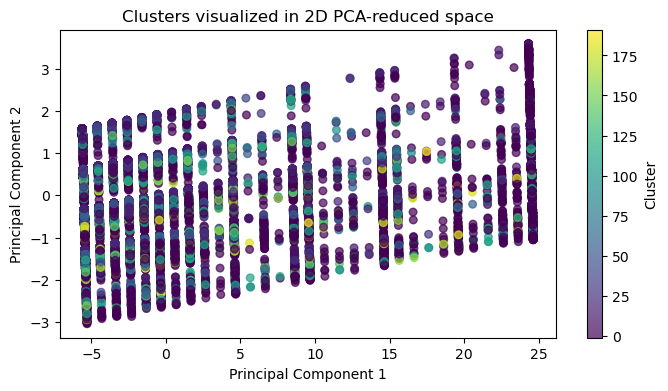

Cluster 0:
  Number of points: 265
  Centroid: [ 0.43010487 -0.57123654 -0.53588362  0.58603399 -0.38616075 -0.3223818
 -0.39155964  1.0144844  -0.29212824 -0.1991056  -0.18091709  4.84471616
 -0.19310437  0.6472688  -0.3437262  -0.39615775 -0.38881364 -0.21458289
 -1.05266714 -0.22870174]
  Standard deviation: [8.63069058e-01 2.99760217e-15 9.99200722e-16 2.66453526e-15
 3.67813161e-01 1.27675648e-15 1.94289029e-15 3.99680289e-15
 6.66133815e-16 5.55111512e-16 5.27355937e-16 3.55271368e-15
 9.15933995e-16 1.66533454e-15 6.66133815e-16 8.32667268e-16
 9.99200722e-16 9.71445147e-16 3.55271368e-15 1.08246745e-15]

Cluster 1:
  Number of points: 468
  Centroid: [ 0.70191206 -0.57123654 -0.53588362  0.58603399 -0.45600847 -0.3223818
 -0.39155964 -0.9857224  -0.29212824 -0.1991056  -0.18091709  4.84471616
 -0.19310437  0.6472688  -0.3437262  -0.39615775 -0.38881364 -0.21458289
 -1.05266714 -0.22870174]
  Standard deviation: [7.47696096e-01 4.21884749e-15 1.11022302e-15 2.99760217e-15
 2.558

In [9]:
# Fit the DBSCAN algorithm and predict clusters

# Initialize the DBSCAN model
dbscan = DBSCAN(eps=1.25, min_samples=40)  # Adjust eps and min_samples as needed
# Fit the DBSCAN model to the data and predict the clusters for each point
y_pred = dbscan.fit_predict(X_scaled)

# Print the number of clusters and noise points
n_clusters = len(set(y_pred)) - (1 if -1 in y_pred else 0)
n_noise = list(y_pred).count(-1)
print(f"Number of clusters: {n_clusters}")
print(f"Number of noise points: {n_noise}")

# Visualize the clusters in 2D PCA-reduced space
# This helps us see the clusters even if we have reduced data dimensionality

# Plotting the clusters
plt.figure(figsize=(8, 4))
# Scatter plot of the data points colored by cluster assignments
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, s=30, cmap='viridis', alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Clusters visualized in 2D PCA-reduced space")
plt.colorbar(scatter, label='Cluster')
plt.show()

# we can print some statistics about each cluster
for cluster in set(y_pred):
    if cluster != -1:  # Exclude noise points
        cluster_points = X_scaled[y_pred == cluster]
        print(f"Cluster {cluster}:")
        print(f"  Number of points: {len(cluster_points)}")
        print(f"  Centroid: {np.mean(cluster_points, axis=0)}")
        print(f"  Standard deviation: {np.std(cluster_points, axis=0)}")
        print()

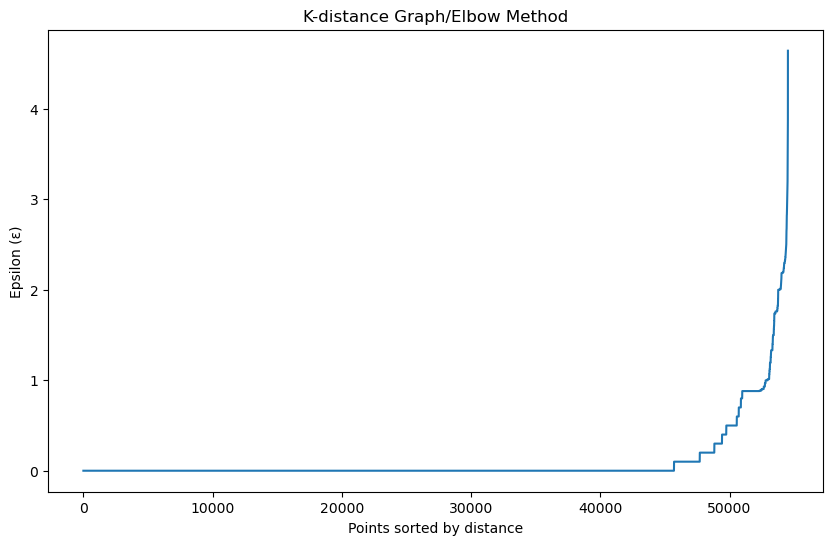

In [11]:
neighbors = NearestNeighbors(n_neighbors=40)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)
distances = np.sort(distances, axis=0)
distances = distances[:,1]

plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('K-distance Graph/Elbow Method')
plt.xlabel('Points sorted by distance')
plt.ylabel('Epsilon (ε)')
plt.show()

In [79]:
# # Silhouette Method
# def silhouette_analysis(X, eps_range, min_samples):
#     silhouette_scores = []
#     n_clusters_list = []
    
#     for eps in eps_range:
#         dbscan = DBSCAN(eps=eps, min_samples=min_samples)
#         labels = dbscan.fit_predict(X)
#         n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        
#         if n_clusters > 1:
#             score = silhouette_score(X, labels)
#             silhouette_scores.append(score)
#             n_clusters_list.append(n_clusters)
#             print(f"For eps={eps:.2f}, n_clusters={n_clusters}, silhouette score={score:.3f}")
#         else:
#             print(f"For eps={eps:.2f}, n_clusters={n_clusters}, silhouette score undefined")
    
#     plt.figure(figsize=(10, 6))
#     plt.plot(eps_range[:len(silhouette_scores)], silhouette_scores, marker='o')
#     plt.xlabel('Epsilon')
#     plt.ylabel('Silhouette Score')
#     plt.title('Silhouette Score vs. Epsilon for DBSCAN')
#     plt.show()

In [81]:
# # Cluster Validity Measures
# def cluster_validity(X, eps_range, min_samples):
#     ch_scores = []
#     db_scores = []
#     n_clusters_list = []
    
#     for eps in eps_range:
#         dbscan = DBSCAN(eps=eps, min_samples=min_samples)
#         labels = dbscan.fit_predict(X)
#         n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        
#         if n_clusters > 1:
#             ch_score = calinski_harabasz_score(X, labels)
#             db_score = davies_bouldin_score(X, labels)
#             ch_scores.append(ch_score)
#             db_scores.append(db_score)
#             n_clusters_list.append(n_clusters)
#             print(f"For eps={eps:.2f}, n_clusters={n_clusters}, CH score={ch_score:.3f}, DB score={db_score:.3f}")
#         else:
#             print(f"For eps={eps:.2f}, n_clusters={n_clusters}, scores undefined")
    
#     plt.figure(figsize=(12, 5))
#     plt.subplot(1, 2, 1)
#     plt.plot(eps_range[:len(ch_scores)], ch_scores, marker='o')
#     plt.xlabel('Epsilon')
#     plt.ylabel('Calinski-Harabasz Score')
#     plt.title('Calinski-Harabasz Score vs. Epsilon')
    
#     plt.subplot(1, 2, 2)
#     plt.plot(eps_range[:len(db_scores)], db_scores, marker='o')
#     plt.xlabel('Epsilon')
#     plt.ylabel('Davies-Bouldin Score')
#     plt.title('Davies-Bouldin Score vs. Epsilon')
    
#     plt.tight_layout()
#     plt.show()


In [89]:
# # Similarity Measure (k-distance graph)
# def k_distance_graph(X, k):
#     neigh = NearestNeighbors(n_neighbors=k)
#     neigh.fit(X)
#     distances, indices = neigh.kneighbors(X)
#     distances = np.sort(distances, axis=0)
#     distances = distances[:,1]
    
#     plt.figure(figsize=(10, 6))
#     plt.plot(distances)
#     plt.xlabel('Points sorted by distance')
#     plt.ylabel('k-distance')
#     plt.title(f'{k}-distance Graph')
#     plt.show()

# # Set parameters
# eps_range = np.arange(1.00,0.25,2.26)
# min_samples = 40

In [109]:
# # Run analyses
# silhouette_analysis(X_scaled, eps_range, min_samples)
# cluster_validity(X_scaled, eps_range, min_samples)
# k_distance_graph(X_scaled, min_samples)

# # Choose the best eps based on the analyses
# best_eps = 0.5  # You should choose this based on the results of the above analyses

# # Final DBSCAN clustering with the best parameters
# dbscan = DBSCAN(eps=best_eps, min_samples=min_samples)
# labels = dbscan.fit_predict(X_scaled)

# # Plot the final clustering result
# plot_clusters(X_pca, labels, f"DBSCAN Clustering (eps={best_eps}, min_samples={min_samples})")

# # Print final cluster statistics
# n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
# n_noise = list(labels).count(-1)
# print(f"Number of clusters: {n_clusters}")
# print(f"Number of noise points: {n_noise}")

# if n_clusters > 1:
#     print(f"Silhouette Score: {silhouette_score(X_scaled, labels):.3f}")
#     print(f"Calinski-Harabasz Score: {calinski_harabasz_score(X_scaled, labels):.3f}")
#     print(f"Davies-Bouldin Score: {davies_bouldin_score(X_scaled, labels):.3f}")


DBSCAN with eps=1:
Number of clusters: 176
Number of noise points: 16766
The average silhouette score is: 0.23669314879223377


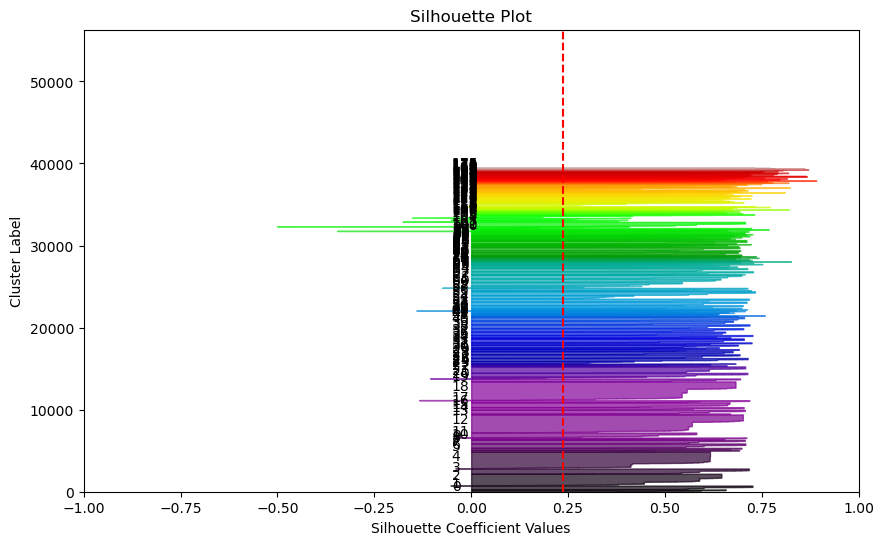

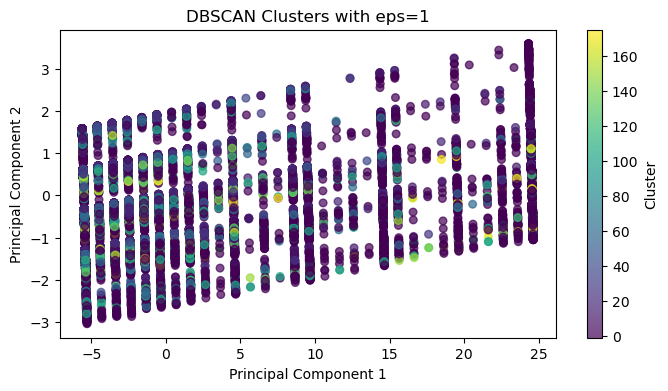


DBSCAN with eps=1.25:
Number of clusters: 192
Number of noise points: 15534
The average silhouette score is: 0.2524146315244918


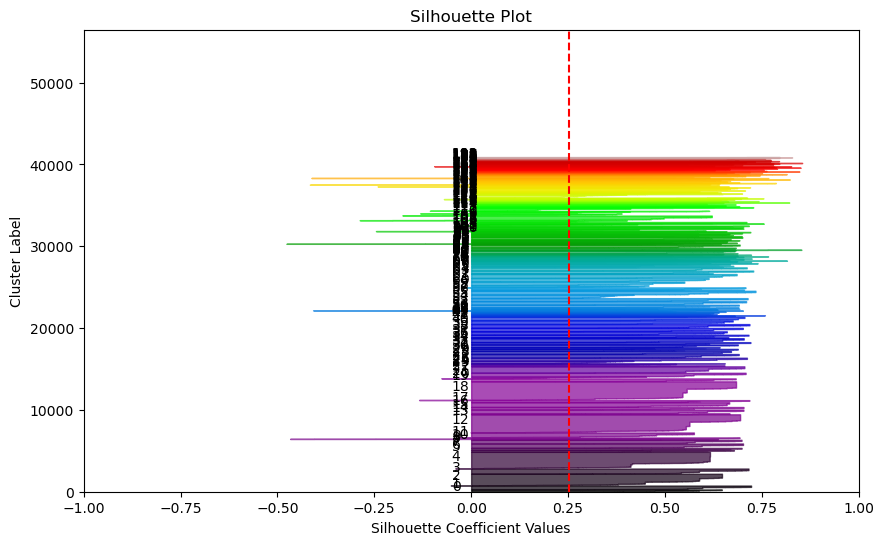

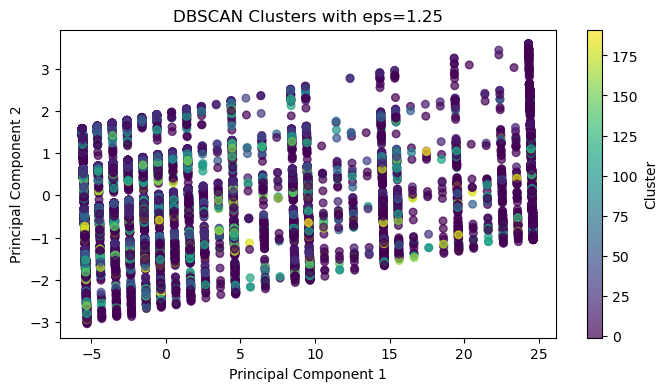


DBSCAN with eps=1.5:
Number of clusters: 195
Number of noise points: 14075
The average silhouette score is: 0.2645095040748905


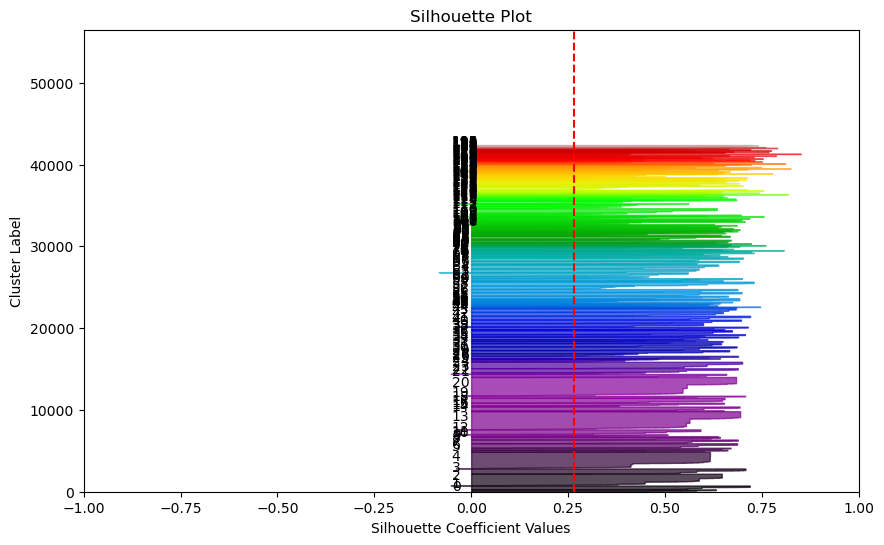

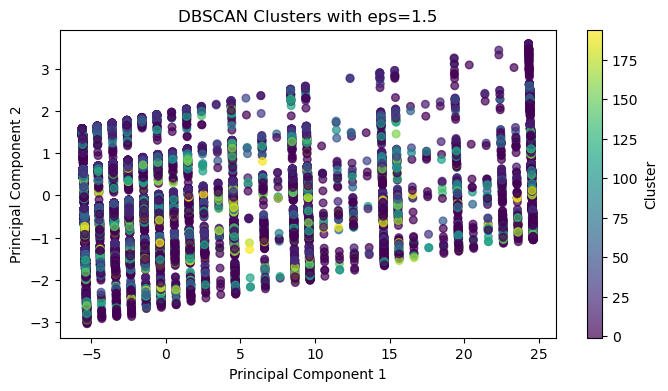


DBSCAN with eps=1.75:
Number of clusters: 206
Number of noise points: 12783
The average silhouette score is: 0.27678194653042365


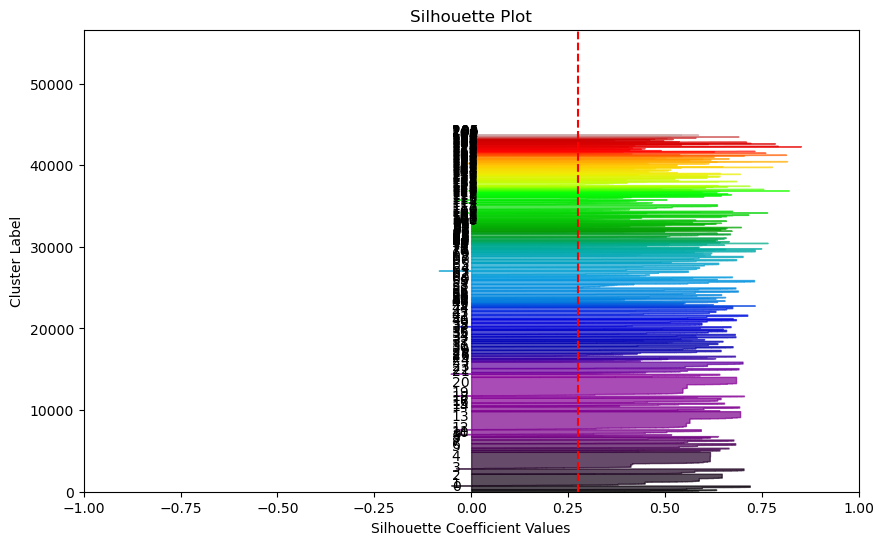

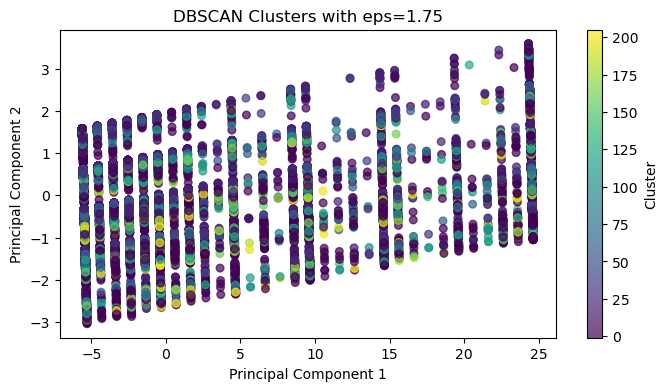


DBSCAN with eps=2:
Number of clusters: 216
Number of noise points: 12077
The average silhouette score is: 0.2860654510502793


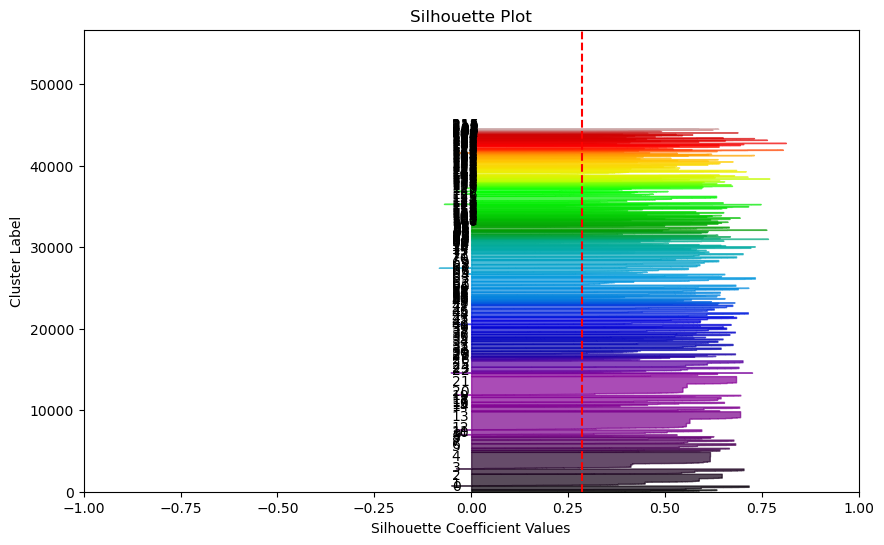

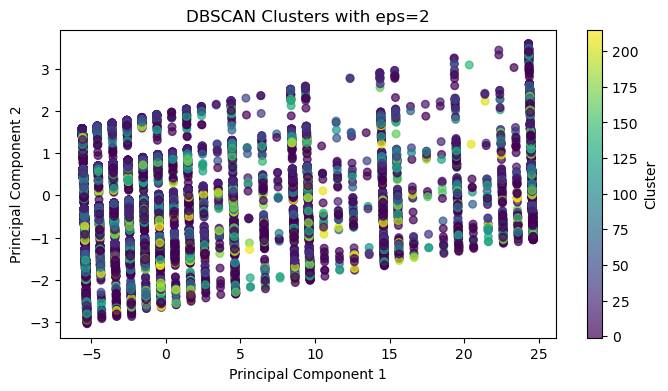


DBSCAN with eps=2.25:
Number of clusters: 76
Number of noise points: 6442
The average silhouette score is: 0.2059747768062651


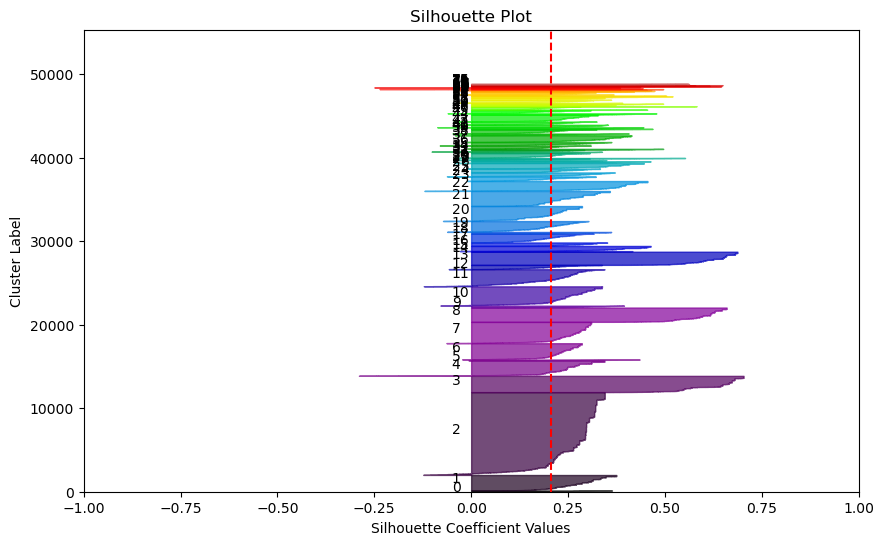

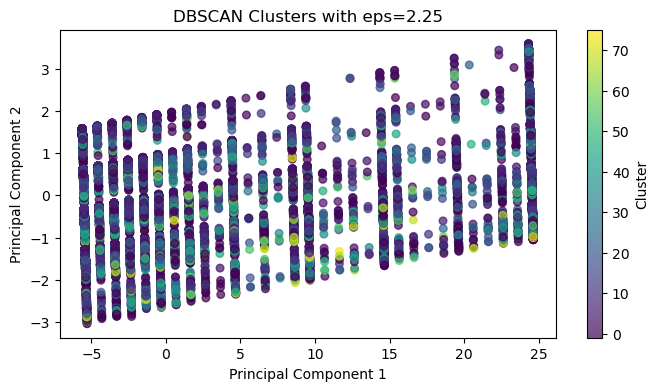

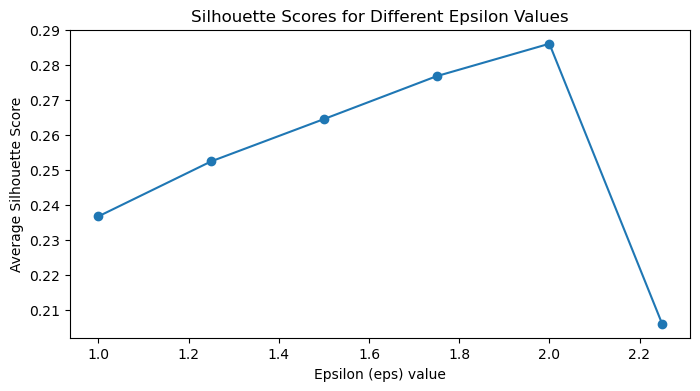

In [29]:
# Silhouette Analysis Function
def silhouette_analysis(X, labels):
    if len(set(labels)) > 1:  # Ensure at least 2 clusters for silhouette score calculation
        silhouette_avg = silhouette_score(X, labels)
        print("The average silhouette score is:", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, labels)

        # Create a silhouette plot
        fig, ax1 = plt.subplots(1, 1, figsize=(10, 6))
        ax1.set_xlim([-1, 1])
        ax1.set_ylim([0, len(X) + (len(set(labels)) + 1) * 10])

        y_lower = 10
        for i in range(len(set(labels))):
            ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
            ith_cluster_silhouette_values.sort()
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / len(set(labels)))
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
        ax1.set_title("Silhouette Plot")
        ax1.set_xlabel("Silhouette Coefficient Values")
        ax1.set_ylabel("Cluster Label")
        plt.show()
        
        return silhouette_avg
    else:
        print("Silhouette score is undefined for this clustering.")
        return None

# Range of eps values to test
eps_values = [1, 1.25, 1.5, 1.75, 2, 2.25]
silhouette_scores = []

# Loop through each eps value
for eps in eps_values:
    print(f"\nDBSCAN with eps={eps}:")
    
    # Initialize DBSCAN with current eps and fit the model
    dbscan = DBSCAN(eps=eps, min_samples=40)
    y_pred = dbscan.fit_predict(X_scaled)
    
    # Calculate the number of clusters and noise points
    n_clusters = len(set(y_pred)) - (1 if -1 in y_pred else 0)
    n_noise = list(y_pred).count(-1)
    print(f"Number of clusters: {n_clusters}")
    print(f"Number of noise points: {n_noise}")
    
    # Perform silhouette analysis
    silhouette_avg = silhouette_analysis(X_scaled, y_pred)
    silhouette_scores.append(silhouette_avg)
    
    # Visualize the clusters in 2D PCA-reduced space
    plt.figure(figsize=(8, 4))
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, s=30, cmap='viridis', alpha=0.7)
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title(f"DBSCAN Clusters with eps={eps}")
    plt.colorbar(scatter, label='Cluster')
    plt.show()

# Plot silhouette scores for each eps
plt.figure(figsize=(8, 4))
plt.plot(eps_values, silhouette_scores, marker='o', linestyle='-')
plt.xlabel("Epsilon (eps) value")
plt.ylabel("Average Silhouette Score")
plt.title("Silhouette Scores for Different Epsilon Values")
plt.show()